# Class Mean PCA

> Examining the space spanned by the class means in feature space

In [ ]:
#| hide
from nbdev.showdoc import *

In [ ]:
from sklearn.decomposition import PCA
from fastai.vision.all import *

from similarity_learning.all import *

from Few_Shot_Feature_Space.utils import *

In [ ]:
def pca(dl, fe):
    class_ftrs = ClassFeatures.compute(dl, fe)
    class_means_stacked = torch.stack([cf.centroid for cf in class_ftrs.values()]).cpu()
    pca = PCA()
    pca.fit(class_means_stacked)

    plt.yscale('log')
    plt.ylabel('Explained Variance Fraction')
    plt.bar(range(pca.n_components_), pca.explained_variance_ratio_)
    plt.axhline(1/pca.n_components_, label=r'$\frac{1}{\mathrm{\# components}}$')
    plt.legend()

In [ ]:
vggface2_fe, casia_webface_fe = fr_feature_extractors()
lfw_dl, pfr_dl = fr_dataloaders()

## VGGFace2

### LFW

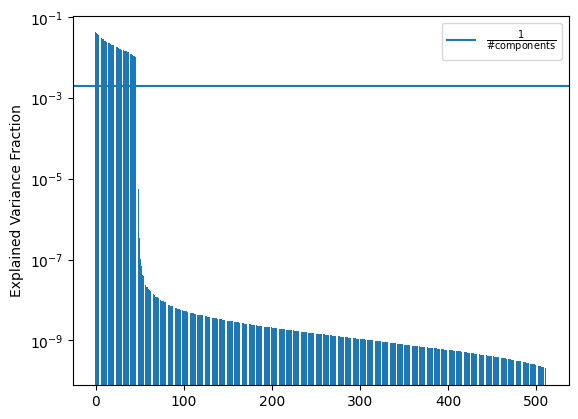

In [ ]:
pca(lfw_dl, vggface2_fe)

### PFR

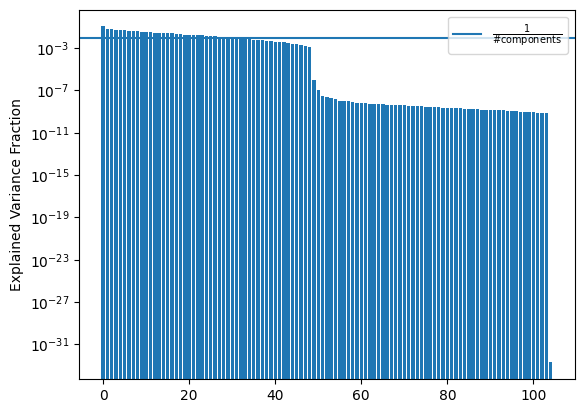

In [ ]:
pca(pfr_dl, vggface2_fe)

## CASIA-WebFace

### LFW

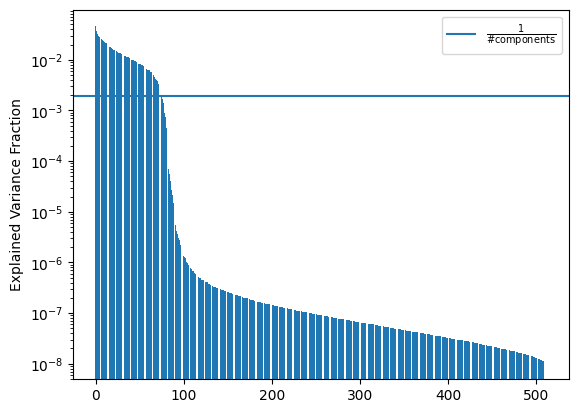

In [ ]:
pca(lfw_dl, casia_webface_fe)

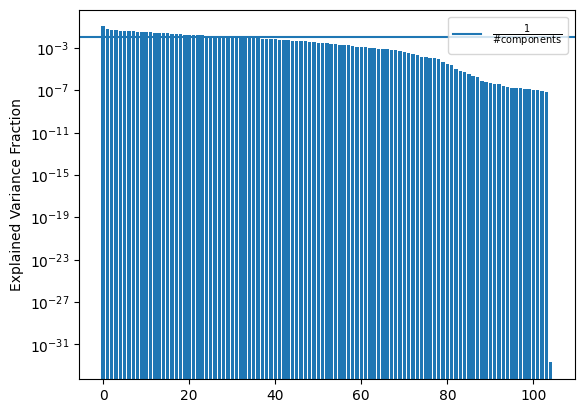

In [ ]:
pca(pfr_dl, casia_webface_fe)